Context

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Content Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
import pandas as pd
pd.set_option('max_columns',None)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data
df=pd.read_csv('TelcoCustomerChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
#check data description
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [5]:
#Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Cleaning

In [6]:
#cek missing value
100*(df.isnull().sum()/len(df))

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [7]:
#cek data dupclicate
df.duplicated().sum()

0

In [8]:
#show unique value
for x in df.columns:
    print(f'unik dari colom {x}')
    print(f'{df[x].unique()}')
    print('=='*50)

unik dari colom customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
unik dari colom gender
['Female' 'Male']
unik dari colom SeniorCitizen
[0 1]
unik dari colom Partner
['Yes' 'No']
unik dari colom Dependents
['No' 'Yes']
unik dari colom tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
unik dari colom PhoneService
['No' 'Yes']
unik dari colom MultipleLines
['No phone service' 'No' 'Yes']
unik dari colom InternetService
['DSL' 'Fiber optic' 'No']
unik dari colom OnlineSecurity
['No' 'Yes' 'No internet service']
unik dari colom OnlineBackup
['Yes' 'No' 'No internet service']
unik dari colom DeviceProtection
['No' 'Yes' 'No internet service']
unik dari colom TechSupport
['No' 'Yes' 'No internet service']
unik dari colom StreamingTV
['No' 'Yes' 'No internet service']


In [9]:
#handling inconsistency
df["MultipleLines"] = df["MultipleLines"].replace("No phone service","No")
df["OnlineSecurity"] = df["OnlineSecurity"].replace("No internet service","No")
df["DeviceProtection"] = df["DeviceProtection"].replace("No internet service","No")
df["OnlineBackup"] = df["OnlineBackup"].replace("No internet service","No")
df["TechSupport"] = df["TechSupport"].replace("No internet service","No")
df["StreamingTV"] = df["StreamingTV"].replace("No internet service","No")
df["StreamingMovies"] = df["StreamingMovies"].replace("No internet service","No")

In [10]:
#show unique value
for x in df.columns:
    print(f'unik dari colom {x}')
    print(f'{df[x].unique()}')
    print('=='*50)

unik dari colom customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
unik dari colom gender
['Female' 'Male']
unik dari colom SeniorCitizen
[0 1]
unik dari colom Partner
['Yes' 'No']
unik dari colom Dependents
['No' 'Yes']
unik dari colom tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
unik dari colom PhoneService
['No' 'Yes']
unik dari colom MultipleLines
['No' 'Yes']
unik dari colom InternetService
['DSL' 'Fiber optic' 'No']
unik dari colom OnlineSecurity
['No' 'Yes']
unik dari colom OnlineBackup
['Yes' 'No']
unik dari colom DeviceProtection
['No' 'Yes']
unik dari colom TechSupport
['No' 'Yes']
unik dari colom StreamingTV
['No' 'Yes']
unik dari colom StreamingMovies
['No' 'Yes']
unik dari colom Contract
['Month-to-month' 'One year' 'Two year']
unik dari colom Pa

In [11]:
#handling missing value
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)

In [12]:
#cek missing value
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
#handling missing value
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)

In [14]:
#cek missing value
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [15]:
#change data type
df['TotalCharges']=df['TotalCharges'].astype('float')

## EDA

In [16]:
#cek data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


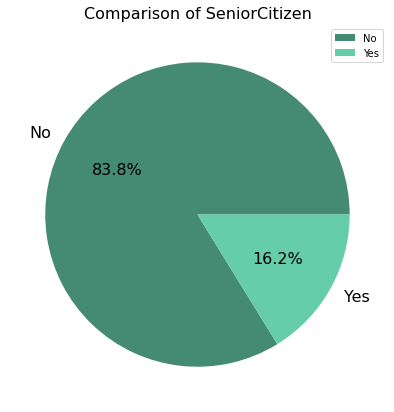

In [17]:
#check perbandingan seniorcitizen
plt.figure(figsize=(7,7))
plt.pie(df['SeniorCitizen'].value_counts(),labels=['No','Yes'],
       autopct='%1.1f%%',textprops={'fontsize': 16},colors=['#458B74','#66CDAA']) #labels memunculkan Yes/No, autopct memunculkan persentasenya
plt.title('Comparison of SeniorCitizen',fontsize=16)#memberi judul
plt.legend() 
#menampilkan legenda

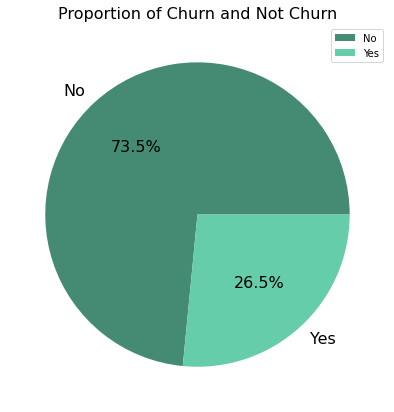

In [18]:
#check perbandingan churn dan tidak churn
plt.figure(figsize=(7,7))
plt.pie(df['Churn'].value_counts(),labels=['No','Yes'],
       autopct='%1.1f%%',textprops={'fontsize': 16},colors=['#458B74','#66CDAA']) #labels memunculkan Yes/No, autopct memunculkan persentasenya
plt.title('Proportion of Churn and Not Churn',fontsize=16)#memberi judul
plt.legend() 
#menampilkan legenda

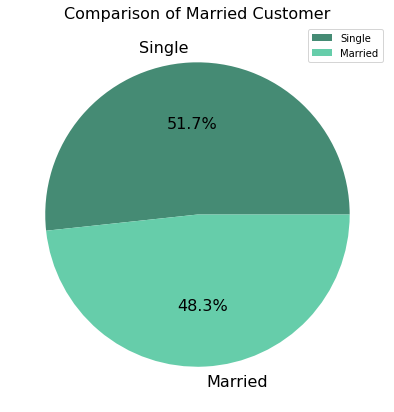

In [19]:
#check perbandingan partner
plt.figure(figsize=(7,7))
plt.pie(df['Partner'].value_counts(),labels=['Single','Married'],
       autopct='%1.1f%%',textprops={'fontsize': 16},colors=['#458B74','#66CDAA']) #labels memunculkan Yes/No, autopct memunculkan persentasenya
plt.title('Comparison of Married Customer',fontsize=16)#memberi judul
plt.legend() 
#menampilkan legenda

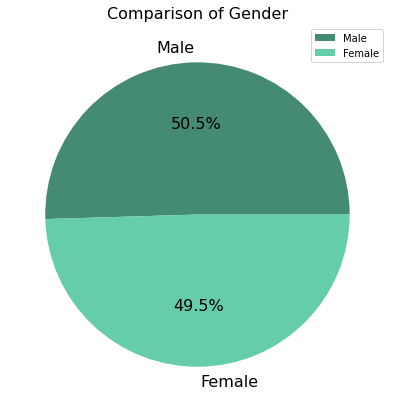

In [20]:
#check perbandingan gender
plt.figure(figsize=(7,7))
plt.pie(df['gender'].value_counts(),labels=['Male','Female'],
       autopct='%1.1f%%',textprops={'fontsize': 16},colors=['#458B74','#66CDAA']) #labels memunculkan Yes/No, autopct memunculkan persentasenya
plt.title('Comparison of Gender',fontsize=16)#memberi judul
plt.legend() 
#menampilkan legenda

Text(0.5, 1.0, 'Distribution of Tenure')

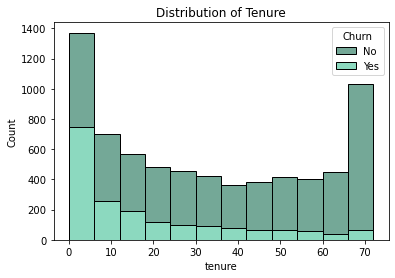

In [21]:
#cek distribuse tenure
sns.histplot(data=df,x='tenure',bins=12,edgecolor='k',palette=['#458B74','#66CDAA'],hue='Churn',multiple='stack')
plt.title('Distribution of Tenure')

Text(0.5, 1.0, 'Distribution of Contract')

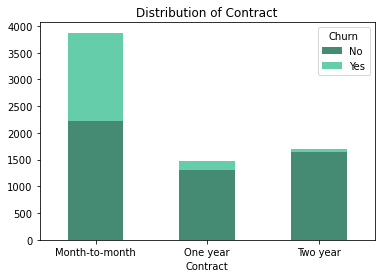

In [22]:
pd.crosstab(df["Contract"],df["Churn"]).plot(kind="bar",stacked=True,color=['#458B74','#66CDAA'])
plt.xticks(rotation=0)
plt.title('Distribution of Contract')

Text(0.5, 1.0, 'Distribution of TotalCharges')

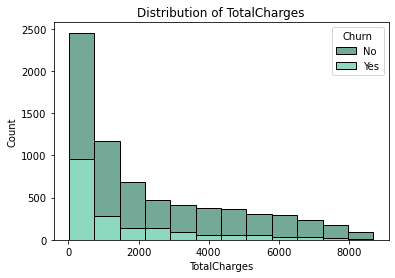

In [23]:
#cek distribusi total charges
sns.histplot(data=df,x='TotalCharges',bins=12,edgecolor='k',palette=['#458B74','#66CDAA'],hue='Churn',multiple='stack')
plt.title('Distribution of TotalCharges')

In [24]:
pd.pivot_table(df,index='Contract',columns='Churn',values='TotalCharges',aggfunc='mean')

Churn,No,Yes
Contract,,
Month-to-month,1521.927590,1164.460574
One year,2902.417578,4066.212048
Two year,3665.133576,5432.363542


Text(0.5, 1.0, 'Comparison of Total Charges with Contract')

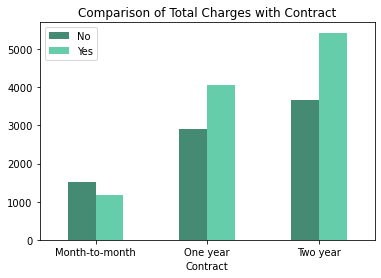

In [25]:
pd.pivot_table(df,index='Contract',columns='Churn',values='TotalCharges',aggfunc='mean').plot(kind='bar',color=['#458B74','#66CDAA'])
plt.legend(labels=['No','Yes'])
plt.xticks(rotation=0)
plt.title('Comparison of Total Charges with Contract')

In [26]:
df['Churn']=df['Churn'].replace(['Yes','No'],[1,0])

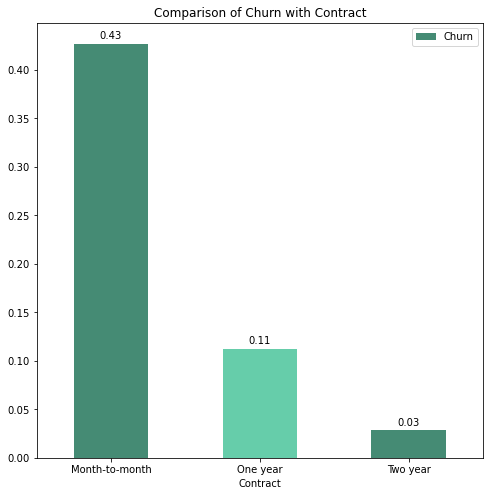

In [27]:
ax=df.groupby('Contract')['Churn'].mean().plot(kind='bar',color=['#458B74','#66CDAA'],figsize=(8,8))
for bar in ax.patches:

    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points',color='k')
plt.xticks(rotation=0)
plt.title('Comparison of Churn with Contract')
plt.legend()

## Data Preprocessing

In [28]:
#bikin fungsi untuk handling nominal yang yes dan no
def convert(x):
    if x=="Yes":
        return 1
    else:
        return 0

In [29]:
#gunakan fungsi apply untuk mengaplikasikan fungsi yang telah dibikin yaitu convert
for x in ["Partner","Dependents","PhoneService","MultipleLines",
          'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies','PaperlessBilling',
       'PaymentMethod']:
    df[x] = df[x].apply(convert)

In [30]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,0,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,0,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,0,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,0,42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,0,70.70,151.65,1


In [31]:
df['gender']=df['gender'].replace(['Male','Female'],[1,0])

In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,0,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,0,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,0,70.70,151.65,1


In [33]:
#handling internet service
#gunakan pd.get_dummies

dummies = pd.get_dummies(df['InternetService'],prefix="service")

In [34]:
#gabungkan dummies dengan kolom df
#gabungkaan kolom metode concat
df = pd.concat([df,dummies],axis=1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,service_DSL,service_Fiber optic,service_No
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,0,29.85,29.85,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,0,56.95,1889.50,0,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,0,53.85,108.15,1,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,0,42.30,1840.75,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,0,70.70,151.65,1,0,1,0


In [35]:
df['Churn']=df['Churn'].replace(['Yes','No'],[1,0])

In [36]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,service_DSL,service_Fiber optic,service_No
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,0,29.85,29.85,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,0,56.95,1889.50,0,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,0,53.85,108.15,1,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,0,42.30,1840.75,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,0,70.70,151.65,1,0,1,0


In [37]:
#buang kolom customerid, paymentmethod, dan internetservice
df = df.drop(['customerID','InternetService','PaymentMethod'],axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,service_DSL,service_Fiber optic,service_No
0,0,0,1,0,1,0,0,0,1,0,0,0,0,Month-to-month,1,29.85,29.85,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,One year,0,56.95,1889.50,0,1,0,0
2,1,0,0,0,2,1,0,1,1,0,0,0,0,Month-to-month,1,53.85,108.15,1,1,0,0
3,1,0,0,0,45,0,0,1,0,1,1,0,0,One year,0,42.30,1840.75,0,1,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,Month-to-month,1,70.70,151.65,1,0,1,0


<AxesSubplot:>

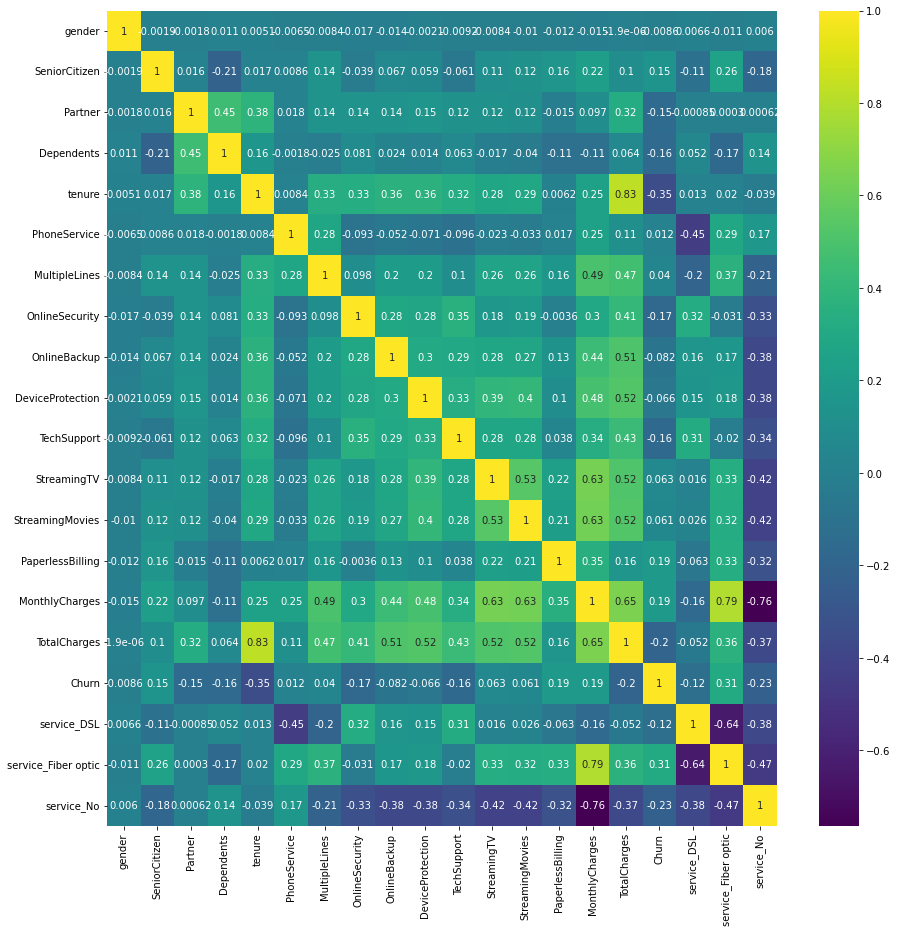

In [38]:
#handling multicolieanrity
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [39]:
#check outliers
df.dtypes

gender                   int64
SeniorCitizen            int64
Partner                  int64
Dependents               int64
tenure                   int64
PhoneService             int64
MultipleLines            int64
OnlineSecurity           int64
OnlineBackup             int64
DeviceProtection         int64
TechSupport              int64
StreamingTV              int64
StreamingMovies          int64
Contract                object
PaperlessBilling         int64
MonthlyCharges         float64
TotalCharges           float64
Churn                    int64
service_DSL              uint8
service_Fiber optic      uint8
service_No               uint8
dtype: object

<AxesSubplot:>

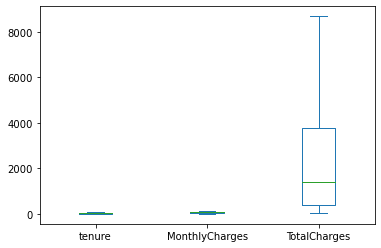

In [40]:
var = ["tenure","MonthlyCharges","TotalCharges"]

df[var].plot(kind='box')

array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>, <AxesSubplot:>]],
      dtype=object)

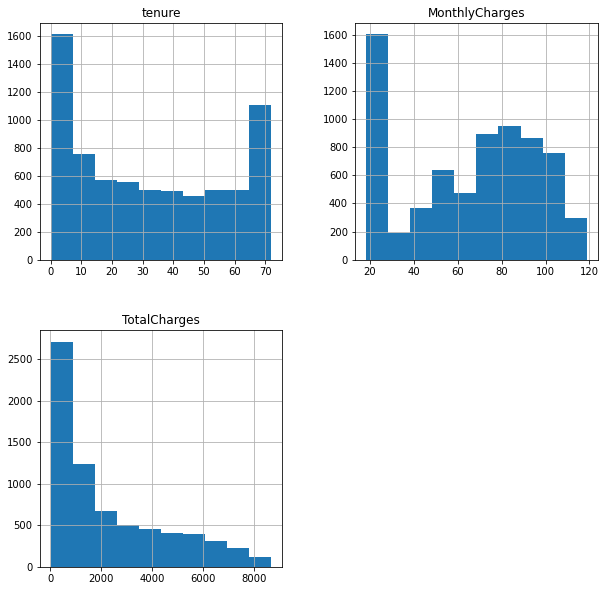

In [41]:
df[var].hist(figsize=(10,10))

array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>, <AxesSubplot:>]],
      dtype=object)

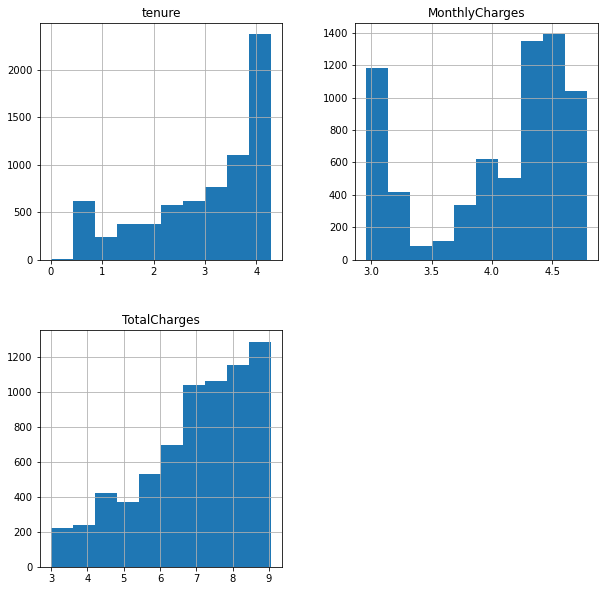

In [42]:
#handling distribution metode logaritma
np.log1p(df[var]).hist(figsize=(10,10))

array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>, <AxesSubplot:>]],
      dtype=object)

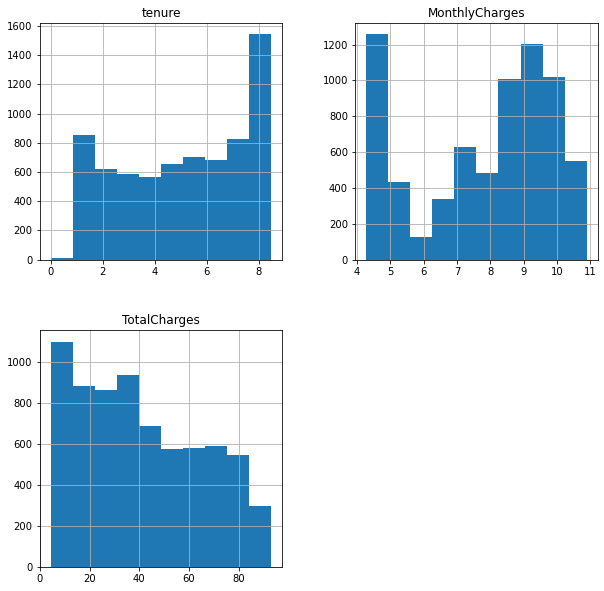

In [43]:
#metode kedua handling metode akar
np.sqrt(df[var]).hist(figsize=(10,10))

In [44]:
df['TotalCharges'] = np.sqrt(df['TotalCharges'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,service_DSL,service_Fiber optic,service_No
0,0,0,1,0,1,0,0,0,1,0,0,0,0,Month-to-month,1,29.85,5.463515,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,One year,0,56.95,43.468379,0,1,0,0
2,1,0,0,0,2,1,0,1,1,0,0,0,0,Month-to-month,1,53.85,10.399519,1,1,0,0
3,1,0,0,0,45,0,0,1,0,1,1,0,0,One year,0,42.30,42.903963,0,1,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,Month-to-month,1,70.70,12.314625,1,0,1,0


In [45]:
#handling categoric
df.dtypes

gender                   int64
SeniorCitizen            int64
Partner                  int64
Dependents               int64
tenure                   int64
PhoneService             int64
MultipleLines            int64
OnlineSecurity           int64
OnlineBackup             int64
DeviceProtection         int64
TechSupport              int64
StreamingTV              int64
StreamingMovies          int64
Contract                object
PaperlessBilling         int64
MonthlyCharges         float64
TotalCharges           float64
Churn                    int64
service_DSL              uint8
service_Fiber optic      uint8
service_No               uint8
dtype: object

In [46]:
#check unik
for x in df.columns:
    print(f'Unik dari colom {x}')
    print(f'{df[x].unique()}')
    print('=='*50)

Unik dari colom gender
[0 1]
Unik dari colom SeniorCitizen
[0 1]
Unik dari colom Partner
[1 0]
Unik dari colom Dependents
[0 1]
Unik dari colom tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unik dari colom PhoneService
[0 1]
Unik dari colom MultipleLines
[0 1]
Unik dari colom OnlineSecurity
[0 1]
Unik dari colom OnlineBackup
[1 0]
Unik dari colom DeviceProtection
[0 1]
Unik dari colom TechSupport
[0 1]
Unik dari colom StreamingTV
[0 1]
Unik dari colom StreamingMovies
[0 1]
Unik dari colom Contract
['Month-to-month' 'One year' 'Two year']
Unik dari colom PaperlessBilling
[1 0]
Unik dari colom MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Unik dari colom TotalCharges
[ 5.46351535 43.46837931 10.39951922 ... 18.61316738 17.50999714
 82.7314934 ]
Unik dari colom Churn
[0 1]
Unik dari colom service

In [47]:
ordinal = ["Contract"]
nominal = ["gender","Partner","Dependents","PhoneService","MultipleLines",
          'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies','PaperlessBilling',
       'PaymentMethod']

In [48]:
#handling ordinal
df["Contract"] = df["Contract"].map({'Month-to-month':0,
                              'One year':1,
                              'Two year':2})

In [49]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,service_DSL,service_Fiber optic,service_No
0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,29.85,5.463515,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,1,0,56.95,43.468379,0,1,0,0
2,1,0,0,0,2,1,0,1,1,0,0,0,0,0,1,53.85,10.399519,1,1,0,0
3,1,0,0,0,45,0,0,1,0,1,1,0,0,1,0,42.30,42.903963,0,1,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,70.70,12.314625,1,0,1,0


In [50]:
#scalling
#metode standard scaller
#yang di scalling hanya predictor
var = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges','service_DSL', 'service_Fiber optic',
       'service_No']

In [51]:
#library scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [52]:
df[var] = scaler.fit_transform(df[var])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,service_DSL,service_Fiber optic,service_No
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-0.633933,1.378241,-0.723968,-0.639439,-0.790132,-0.79607,-0.828207,0.829798,-1.160323,-1.449035,0,1.381712,-0.885660,-0.525927
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,1.577454,-0.725563,1.381277,-0.639439,-0.790132,-0.79607,0.371271,-1.205113,-0.259629,0.100847,0,1.381712,-0.885660,-0.525927
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,1.577454,1.378241,-0.723968,-0.639439,-0.790132,-0.79607,-0.828207,0.829798,-0.362660,-1.247739,1,1.381712,-0.885660,-0.525927
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-0.854176,1.577454,-0.725563,1.381277,1.563872,-0.790132,-0.79607,0.371271,-1.205113,-0.746535,0.077829,0,1.381712,-0.885660,-0.525927
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.79607,-0.828207,0.829798,0.197365,-1.169639,1,-0.723740,1.129102,-0.525927


In [53]:
# bangun model

X=df.drop('Churn',axis=1)
y=df['Churn']


In [54]:
#proporsi 70% training 30% testing
#library membagi

from sklearn.model_selection import train_test_split

#library machine learning
#machine learing logistic regression
from sklearn.linear_model import LogisticRegression

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)

## Modeling

In [56]:
#bangun model
logreg = LogisticRegression(random_state=42)

In [57]:
#proporsi 70% training 30% testing
#library membagi

from sklearn.model_selection import train_test_split

#library machine learning
#machine learing logistic regression
from sklearn.linear_model import LogisticRegression

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)

In [59]:
#bangun model
logreg = LogisticRegression(random_state=42)

In [60]:
logreg.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [61]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [62]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3622
           1       0.68      0.52      0.58      1308

    accuracy                           0.81      4930
   macro avg       0.76      0.71      0.73      4930
weighted avg       0.80      0.81      0.80      4930



Text(33.0, 0.5, 'Realita')

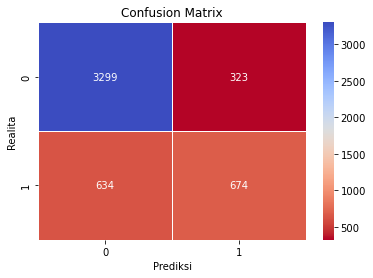

In [63]:
cnf_matrix = confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Realita')

In [64]:
print("Accuracy Training data : ",metrics.accuracy_score(y_train,y_train_pred))
print("Recall Training data : ",metrics.recall_score(y_train,y_train_pred))
print("Precision Training data : ",metrics.precision_score(y_train,y_train_pred))
print("F-1 Training data : ",metrics.f1_score(y_train,y_train_pred))

Accuracy Training data :  0.8058823529411765
Recall Training data :  0.5152905198776758
Precision Training data :  0.6760280842527583
F-1 Training data :  0.5848156182212583


              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1552
           1       0.68      0.50      0.58       561

    accuracy                           0.81      2113
   macro avg       0.76      0.71      0.72      2113
weighted avg       0.79      0.81      0.79      2113



Text(33.0, 0.5, 'Realita')

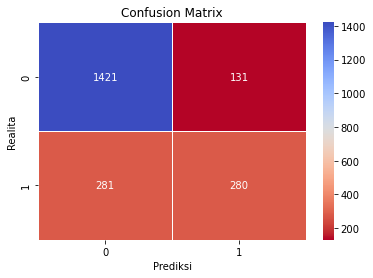

In [65]:
cnf_matrix = confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Realita')

In [66]:
print("Accuracy Test data : ",metrics.accuracy_score(y_test,y_test_pred))
print("Recall Test data : ",metrics.recall_score(y_test,y_test_pred))
print("Precision Test data : ",metrics.precision_score(y_test,y_test_pred))
print("F-1 Test data : ",metrics.f1_score(y_test,y_test_pred))

Accuracy Test data :  0.8050165641268339
Recall Test data :  0.49910873440285203
Precision Test data :  0.681265206812652
F-1 Test data :  0.5761316872427983


In [67]:
df.shape

(7043, 21)